### 출력층

In [1]:
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)#n_upper - 가중치의 row수 입력의 column수
                                                                        #
        self.b = wb_width * np.random.randn(n)
        # wb_width = 0.01 가중치와 편향 설정을 위한 정규분포의 표준편차
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u #최종출력은 항등함수사용. 그렇기때문에 u와 동일
            
            
    def backward(self, t):
        delta = self.y - t #델타는 y-t 이다
        self.grad_w = np.dot(self.x.T, delta) #가중치에대한 기울기
        self.grad_b = np.sum(delta, axis=0) # bias에 대한 기울기
        self.grad_x = np.dot(delta, self.w.T) 
            
    def update(self, eta):
        self.w -= eta * self.grad_w #기존의 w에서 빼줘서  값을 갱신해준다
        self.b -= eta * self.grad_b

### 은닉층

In [2]:
class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u =np.dot(x, self.w) + self.b
        self.y = 1 / (1 + np.exp(-u)) # 시그모이드함수
        
    def backward(self, grad_y):
        delta = grad_y * (1 - self.y) * self.y # 시그모이드 미분
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [3]:
import matplotlib.pyplot as plt
import numpy as np

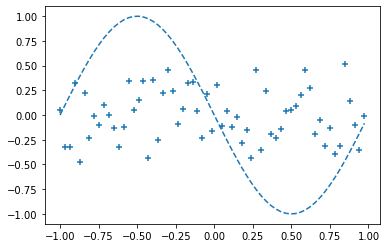

Epoch:0/2001 Error:0.2612767544743758


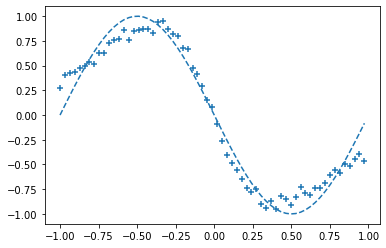

Epoch:200/2001 Error:0.009278726046732069


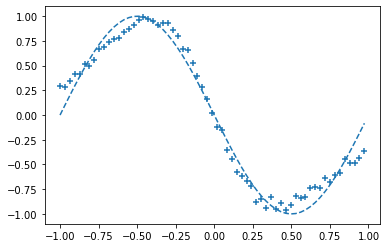

Epoch:400/2001 Error:0.006325894956428669


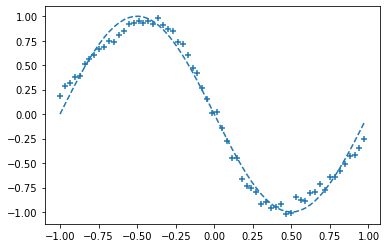

Epoch:600/2001 Error:0.0037284328146872585


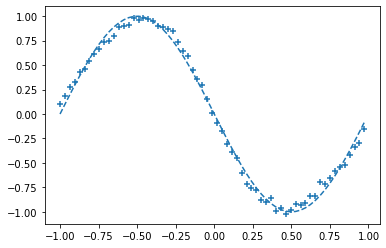

Epoch:800/2001 Error:0.0016721901319302998


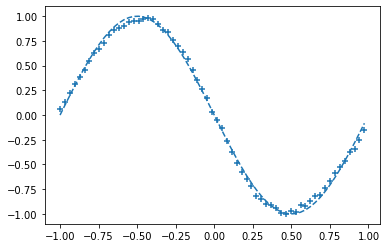

Epoch:1000/2001 Error:0.0006454991669121284


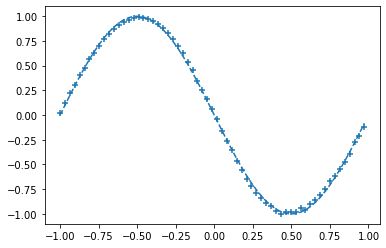

Epoch:1200/2001 Error:0.00021294033796932674


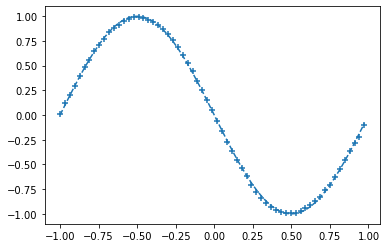

Epoch:1400/2001 Error:7.283836914457432e-05


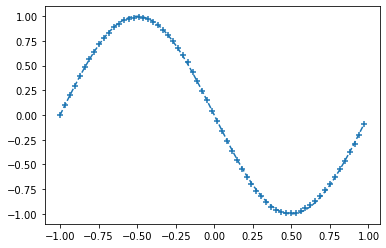

Epoch:1600/2001 Error:3.6134867583639794e-05


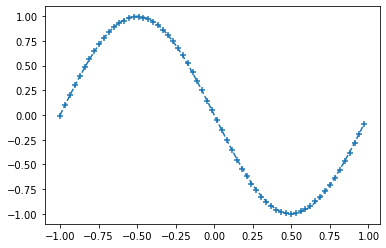

Epoch:1800/2001 Error:1.8856598969309383e-05


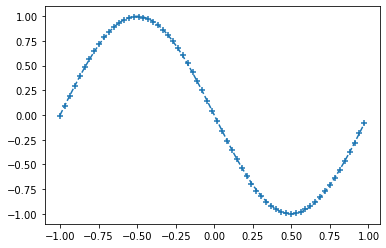

Epoch:2000/2001 Error:1.358382647427219e-05


In [4]:
input_data = np.arange(0, np.pi*2, 0.1)
correct_data = np.sin(input_data)
input_data = (input_data - np.pi) / np.pi # 입력을 -1.0 ~ 1.0
n_data = len(correct_data) # 전체 데이터의 갯수

# 초기값 설정
n_in = 1 # 입력층의 뉴런 수
n_mid = 3 #은닉층의 뉴런 수
n_out = 1 # 출력층의 뉴런 수

wb_width = 0.01
eta = 0.1 # 학습률
epoch = 2001
interval = 200 # 진행과정보기위해 interval

# 각 층의 초기화
middle_layer = MiddleLayer(n_in, n_mid) #입력, 출력
output_layer = OutputLayer(n_mid, n_out)

for i in range(epoch):
    
    index_random = np.arange(n_data) # 0부터 데이터 총갯수를 index로 잡는다
    np.random.shuffle(index_random) # shuffle 기능으로 index를 섞어줌
    
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        x = input_data[idx:idx+1] # 하나만 뽑아냄
        t = correct_data[idx:idx+1] # 타겟
        
        middle_layer.forward(x.reshape(1,1)) # x(scalar)를 배열로 만들어줌
        output_layer.forward(middle_layer.y)
        
        #역전파
        output_layer.backward(t.reshape(1,1))
        middle_layer.backward(output_layer.grad_x) 
        
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval == 0:
            y = output_layer.y.reshape(-1) #output_layer.y는 2차원이기떄문에 1차원으로 바꿔줌
            
            # 오차계산(오차제곱합)
            total_error += 1.0 / 2.0 * np.sum(np.square(y - t))
            
            plot_x.append(x)
            plot_y.append(y)
            
    if i % interval == 0:
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker='+')
        plt.show()
    
        print("Epoch:"+str(i)+'/'+str(epoch), \
         "Error:"+str(total_error/n_data))

- 은닉층의 뉴런수를 1, 2, 3, 4, 5 차례로 증가시키며 결과를 확인
- 3 또는 4개의 뉴런 이후에는 결과가 더 좋아지지 않고 계산량만 증가(뉴런수를 늘리면 w수도 늘어나기떄문에)
- 이 문제에서는 은닉층에서 3 또는 4개의 뉴런이 최적임
- 은닉층에서 필요 이상의 뉴런 수는 과적합을 일으킴

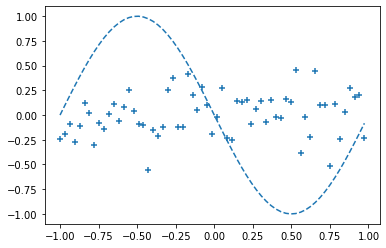

Epoch:0/2001 Error:0.29136294632547777


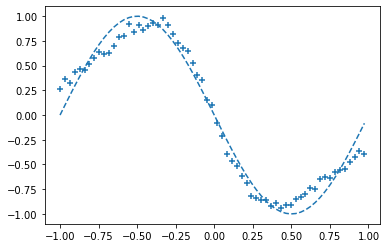

Epoch:200/2001 Error:0.007606786192322762


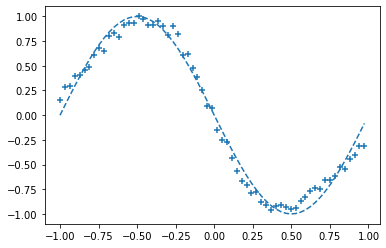

Epoch:400/2001 Error:0.004026326572571706


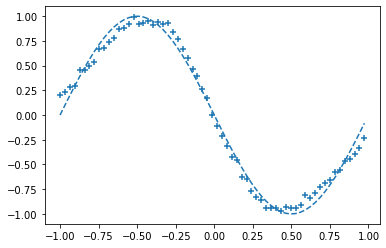

Epoch:600/2001 Error:0.003119950708119422


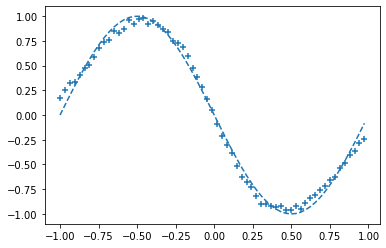

Epoch:800/2001 Error:0.002139867504660304


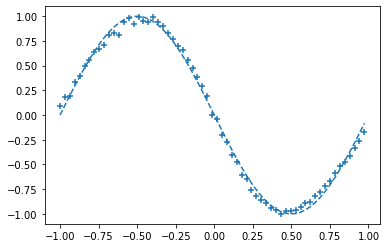

Epoch:1000/2001 Error:0.0012062968431560872


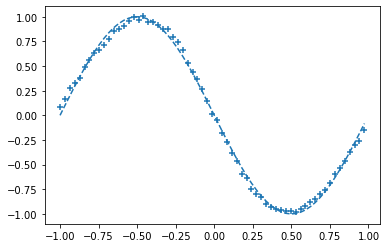

Epoch:1200/2001 Error:0.0007778823073934611


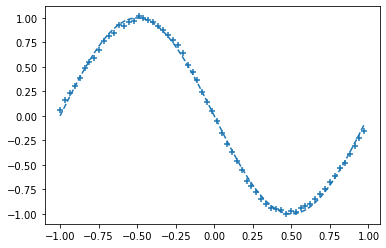

Epoch:1400/2001 Error:0.0004292595557925046


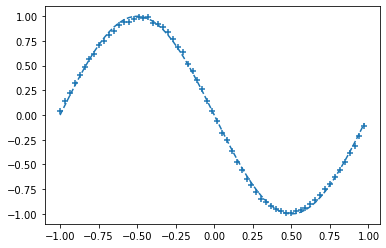

Epoch:1600/2001 Error:0.0002552198188227908


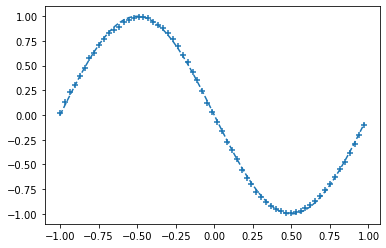

Epoch:1800/2001 Error:0.00013584498396438023


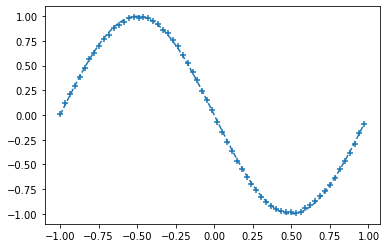

Epoch:2000/2001 Error:7.891657968950332e-05


In [8]:
input_data = np.arange(0, np.pi*2, 0.1)
correct_data = np.sin(input_data)
input_data = (input_data - np.pi) / np.pi # 입력을 -1.0 ~ 1.0
n_data = len(correct_data) # 전체 데이터의 갯수

# 초기값 설정
n_in = 1 # 입력층의 뉴런 수
n_mid = 5 #은닉층의 뉴런 수
n_out = 1 # 출력층의 뉴런 수

wb_width = 0.01
eta = 0.1 # 학습률
epoch = 2001
interval = 200 # 진행과정보기위해 interval

# 각 층의 초기화
middle_layer = MiddleLayer(n_in, n_mid) #입력, 출력
output_layer = OutputLayer(n_mid, n_out)

for i in range(epoch):
    
    index_random = np.arange(n_data) # 0부터 데이터 총갯수를 index로 잡는다
    np.random.shuffle(index_random) # shuffle 기능으로 index를 섞어줌
    
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        x = input_data[idx:idx+1] # 하나만 뽑아냄
        t = correct_data[idx:idx+1] # 타겟
        
        middle_layer.forward(x.reshape(1,1)) # x(scalar)를 배열로 만들어줌
        output_layer.forward(middle_layer.y)
        
        #역전파
        output_layer.backward(t.reshape(1,1))
        middle_layer.backward(output_layer.grad_x) 
        
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval == 0:
            y = output_layer.y.reshape(-1) #output_layer.y는 2차원이기떄문에 1차원으로 바꿔줌
            
            # 오차계산(오차제곱합)
            total_error += 1.0 / 2.0 * np.sum(np.square(y - t))
            
            plot_x.append(x)
            plot_y.append(y)
            
    if i % interval == 0:
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker='+')
        plt.show()
    
        print("Epoch:"+str(i)+'/'+str(epoch), \
         "Error:"+str(total_error/n_data))